### Polymer Profiles

This notebook contains a customizable plotting template for generating the core DISCO polymer profile plots, including:
* DISCO Fingerprint
* DISCO Buildup Curve
* DISCO Change Profile

Raw data files are generated as direct outputs of the disco data processing code. All plotting code in this repository is written to be inherently compatible with the disco data processing code outputs, such that any polymer's raw files can be read and plotted in a custom manner with this code. 

In this release, to change the polymers shown in the plots in this repository, simply change the filepath of the initial data read to your desired polymer data file, and adjust the boilerplate plotting code that follows as desired. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import custom plotting and data manipulation functions to create DISCO plots.

In [2]:
from utils.wrangle_data import generate_disco_effect_mean_diff_df, generate_subset_sattime_df 
from utils.plotting import add_fingerprint_toax, add_buildup_toax, add_difference_plot_transposed, add_overlaid_buildup_toax_customlabels, add_difference_plot
from utils.plotting_helpers import assemble_peak_buildup_df

In [3]:
# Define a custom output directory for formal figures
output_directory = "../paper/figurefiles"


Set global figure properties as desired. The colour palette in this work was selected from the Color Brewer qualitative contrast scheme. 

For more information on colour brewer see: https://colorbrewer2.org/#type=qualitative&scheme=Set1&n=9

In [15]:
from matplotlib.ticker import FormatStrFormatter # set decimal places

plt.style.use(['science', 'discolib'])
plt.rc('text', usetex=True)
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.size': 6})


### HPC 370kDa Profile

In [5]:
# query the required data tables for all styles of plotting for desired polymers
# high mW HPC
high_hpc_mean_all = pd.read_excel("../data/raw/stats_analysis_output_mean_all_HPC_370k_20uM.xlsx", index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()
high_hpc_mean_bindingonly = pd.read_excel("../data/raw/stats_analysis_output_mean_HPC_370k_20uM.xlsx", index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()
high_hpc_replicate_all = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_HPC_370k_20uM.xlsx", index_col=[0], header=[0]).reset_index(drop=True)
high_hpc_replicate_bindingonly = pd.read_excel("../data/raw/stats_analysis_output_replicate_HPC_370k_20uM.xlsx", index_col=[0], header=[0]).reset_index(drop=True)

# low mW HPC
low_hpc_mean_all = pd.read_excel("../data/raw/stats_analysis_output_mean_all_HPC_80k_20uM.xlsx", index_col=[0, 1, 2, 3], header=[0, 1]).reset_index()
low_hpc_replicate_all = pd.read_excel("../data/raw/stats_analysis_output_replicate_all_HPC_80k_20uM.xlsx", index_col=[0], header=[0]).reset_index(drop=True)
low_hpc_replicate_bindingonly = pd.read_excel("../data/raw/stats_analysis_output_replicate_HPC_80k_20uM.xlsx", index_col=[0], header=[0]).reset_index(drop=True)

Next, design a custom plot layout using the mosaic, and apply builtin functions to overlay DISCO AF0 fingerprints, and peak buildup curves as desired.

See this tutorial on Mosaic plots for a helpful introduction: https://matplotlib.org/stable/tutorials/provisional/mosaic.html

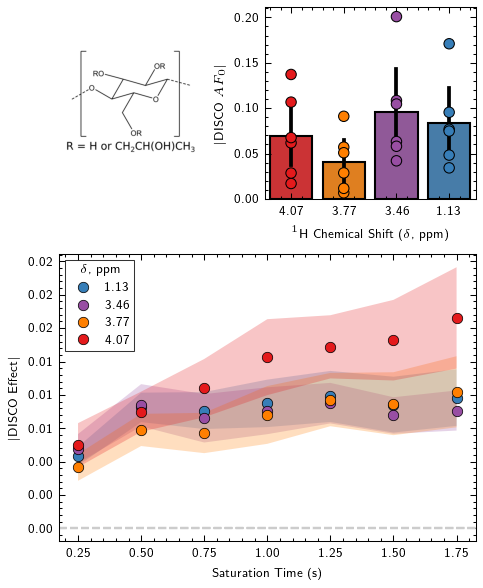

In [17]:
mosaic = """
    AB
    CC
    """

gs_kw = dict(width_ratios=[1, 1.5], height_ratios=[1, 1.5])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(3.3, 4),
                              constrained_layout=False, dpi=150)

hpc_structure = plt.imread("../data/external/hpc_repeatunit.png", format="png")

# Polymer Structure Axis
axd['A'].imshow(hpc_structure)
axd['A'].axis('off')
axd['A'].xaxis.set_visible(False)
axd['A'].yaxis.set_visible(False)

# Binding fingerprint plot
add_fingerprint_toax(high_hpc_replicate_bindingonly, axd['B'])
axd['B'].set_ylabel("$$|\mbox{DISCO $AF_0$}|$$", fontsize = 6)
axd['B'].set_xlabel("$^1$H Chemical Shift ($\delta$, ppm)", fontsize = 6)
axd['B'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Build up curve plot
add_buildup_toax(high_hpc_mean_bindingonly, axd['C'])
axd['C'].set_ylabel("$$|\mbox{DISCO Effect}|$$", fontsize = 6)
axd['C'].set_xlabel("Saturation Time (s)", fontsize = 6)
axd['C'].axhline(y=0.0, color="0.8", linestyle='dashed')
axd['C'].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axd['C'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axd['C'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))
axd['C'].tick_params(axis='x', labelsize = 6)
axd['C'].tick_params(axis='y', labelsize = 6)

# format legend
props = dict(facecolor='white', linewidth=0.5)
legC = axd['C'].legend(loc='upper left', title="$\delta$, ppm", frameon=True, fontsize=6, fancybox = False)
legC.get_frame().set_edgecolor('k')
legC.get_title().set_fontsize('6')
legC.get_frame().set_linewidth(0.5)

# Write figures to file 
output_filename2 = f"{output_directory}/hpc.png"
output_filename = f"{output_directory}/hpc.svg"
plt.tight_layout()
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)
fig.savefig(output_filename2, dpi=500, transparent=False)


### HPC Change Profile

The code below:
* preprocesses data to ready it for difference profile plotting. 
* subsets data to NMR Sat Time = 0.25s
* prints results report of statistical testing for change significance (p < 0.05)

The difference profile plot is created using the "subset_sattime_df," which contains only the mean difference in disco effect data computed for the desired saturation time slice (0.25s).

In [7]:
print("HPC Results:")
hpc_effect_size_df = generate_disco_effect_mean_diff_df(low_hpc_replicate_all, high_hpc_replicate_all)
hpc_subset_sattime_df = generate_subset_sattime_df(hpc_effect_size_df, 0.25)

HPC Results:
Sig Point is: 0.25, 4.5814, p = 0.002852946493998779, n = 6
Sig Point is: 0.25, 4.06765, p = 0.022112708130022727, n = 6
Sig Point is: 0.5, 4.5814, p = 0.04792935070570668, n = 6
Sig Point is: 1.0, 4.06765, p = 0.02587405440747963, n = 6
Sig Point is: 1.5, 4.5814, p = 0.013839648335416047, n = 6
Sig Point is: 1.5, 4.06765, p = 0.030839653145183932, n = 6
Sig Point is: 1.75, 4.5814, p = 0.008178181853274912, n = 6


Now, assemble custom mosaic for plotting HPC's difference profile.

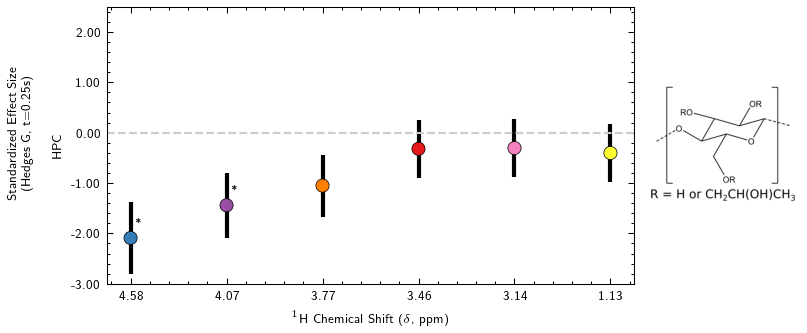

In [19]:
mosaic = '''
E.B
'''

ppm_colors = ['#377eb8', '#984ea3', '#ff7f00', '#e41a1c', '#f781bf',
              '#ffff33', '#4daf4a', '#a65628', '#999999']

gs_kw = dict(width_ratios=[1,0.05,0.3], height_ratios=[2.5])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(5, 2),
                              constrained_layout=False, dpi=150)

# read image data
hpc_structure = plt.imread("../data/external/hpc_repeatunit.png", format="png")

# polymer structure - HPC
axd['B'].imshow(hpc_structure)
axd['B'].axis('off')
axd['B'].xaxis.set_visible(False)
axd['B'].yaxis.set_visible(False)

# difference fingerprint - HPC
add_difference_plot_transposed(df=hpc_subset_sattime_df, ax=axd['E'], dy=0.3, **{"custom_colors": ppm_colors})
axd["E"].set_ylabel("HPC")
axd["E"].set_ylim(-3, 2.5)  
axd['E'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axd['E'].set_xlabel("$^1$H Chemical Shift ($\delta$, ppm)", fontsize=6)
axd['E'].tick_params(axis='x', labelsize=6)
axd['E'].tick_params(axis='y', labelsize=6)

# triple ax label
t = axd['E'].text(-0.15, 0, "Standardized Effect Size \n(Hedges G, t=0.25s)", ha="center", va="center", rotation=90, fontsize =6)

# write to file
output_filename = f"{output_directory}/hpc_change_fig.svg"
output_filename2 = f"{output_directory}/hpc_change_fig.png"
fig.patch.set_facecolor('white')
plt.tight_layout(pad = -0.75)
fig.savefig(output_filename, dpi=500, transparent=False)
fig.savefig(output_filename2, dpi=500, transparent=False)


### HPC Change Profile, with peak-wise buildup curves

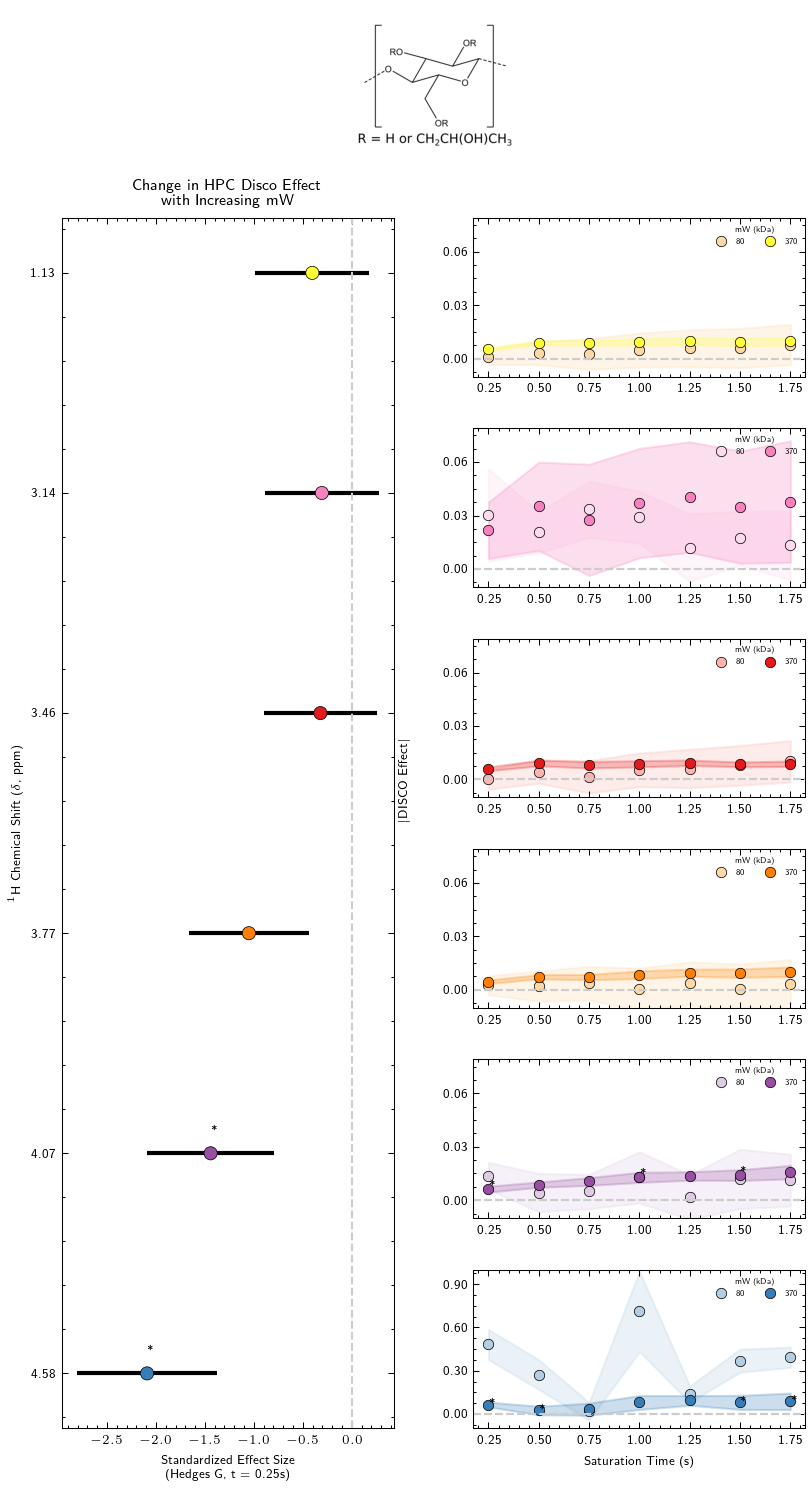

In [20]:
# HPC
ppi_1_low = assemble_peak_buildup_df(low_hpc_replicate_all, 1)
ppi_2_low = assemble_peak_buildup_df(low_hpc_replicate_all, 2)
ppi_3_low = assemble_peak_buildup_df(low_hpc_replicate_all, 3)
ppi_4_low = assemble_peak_buildup_df(low_hpc_replicate_all, 4)
ppi_5_low = assemble_peak_buildup_df(low_hpc_replicate_all, 5)
ppi_6_low = assemble_peak_buildup_df(low_hpc_replicate_all, 6)

ppi_1_high = assemble_peak_buildup_df(high_hpc_replicate_all, 1)
ppi_2_high = assemble_peak_buildup_df(high_hpc_replicate_all, 2)
ppi_3_high = assemble_peak_buildup_df(high_hpc_replicate_all, 3)
ppi_4_high = assemble_peak_buildup_df(high_hpc_replicate_all, 4)
ppi_5_high = assemble_peak_buildup_df(high_hpc_replicate_all, 5)
ppi_6_high = assemble_peak_buildup_df(high_hpc_replicate_all, 6)

# now assemble the macro figure combining the interaction information and the "delta" information
mosaic = """
    AA
    BF
    BG
    BH
    BI
    BJ
    BK
"""


gs_kw = dict(width_ratios=[1.0, 1],
             height_ratios=[1, 1, 1, 1, 1, 1, 1])

fig, axd = plt.subplot_mosaic(mosaic,
                              gridspec_kw=gs_kw, figsize=(5.5, 10),
                              constrained_layout=False, dpi=150)

# always ensure low to high order for correct labelling
hpc_names = ["80", "370"]
ppm_colors = ['#377eb8', '#984ea3', '#ff7f00', '#e41a1c', '#f781bf',
              '#ffff33', '#4daf4a', '#a65628', '#999999']

# low vs high per ppm
buildup_colors9 = ['#f2f2f2',  '#999999']
buildup_colors8 = ['#e5d8bd',  '#a65628']
buildup_colors7 = ['#ccebc5', '#4daf4a']
buildup_colors6 = ['#fed9a6', '#ffff33']
buildup_colors5 = ['#fddaec',  '#f781bf']
buildup_colors4 = ['#fbb4ae',  '#e41a1c']
buildup_colors3 = ['#fed9a6', '#ff7f00']
buildup_colors2 = ["#decbe4", "#984ea3"]
buildup_colors1 = ['#b3cde3', '#377eb8']

kwargs = {"labels": hpc_names,
          "dx": 0.001,
          "dy": 0.0020,
          "change_significance": hpc_effect_size_df,
          "annot_color": "#000000"}

# Structure Axis
axd['A'].imshow(hpc_structure)
axd['A'].axis('off')
axd['A'].xaxis.set_visible(False)
axd['A'].yaxis.set_visible(False)
axd['A'].set_xlabel("Hydroxypropyl Cellulose")


# add delta fingerprint - difference
add_difference_plot(df=hpc_subset_sattime_df,
                  ax=axd['B'], dy=0.1, **{"custom_colors": ppm_colors})
axd["B"].set_title("Change in HPC Disco Effect\nwith Increasing mW")
axd["B"].set_xlabel("Standardized Effect Size \n(Hedges G, t = 0.25s)")
axd["B"].set_ylabel("$^1$H Chemical Shift ($\delta$, ppm)")

# add buildup curve subtractions for each peak
df_list = [ppi_1_low, ppi_1_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['K'], **kwargs, **{"custom_colors": buildup_colors1})
axd['K'].set_ylim((-0.1, 1.0))
axd['K'].yaxis.set_ticks(np.arange(0.0, 1.0, 0.3))
axd['K'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))
axd['K'].set_xlabel("Saturation Time (s)")

df_list = [ppi_2_low, ppi_2_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['J'], **kwargs, **{"custom_colors": buildup_colors2})
axd['J'].set_ylim((-0.01, 0.079))
axd['J'].yaxis.set_ticks(np.arange(0.0, 0.075, 0.03))
axd['J'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_3_low, ppi_3_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['I'], **kwargs, **{"custom_colors": buildup_colors3})
axd['I'].set_ylim((-0.01, 0.079))
axd['I'].yaxis.set_ticks(np.arange(0.0, 0.075, 0.03))
axd['I'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_4_low, ppi_4_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['H'], **kwargs, **{"custom_colors": buildup_colors4})
axd['H'].set_ylim((-0.01, 0.079))
axd['H'].yaxis.set_ticks(np.arange(0.0, 0.075, 0.03))
axd['H'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_5_low, ppi_5_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['G'], **kwargs, **{"custom_colors": buildup_colors5})
axd['G'].set_ylim((-0.01, 0.079))
axd['G'].yaxis.set_ticks(np.arange(0.0, 0.075, 0.03))
axd['G'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))

df_list = [ppi_6_low, ppi_6_high]
add_overlaid_buildup_toax_customlabels(df_list, axd['F'], **kwargs, **{"custom_colors": buildup_colors6})
axd['F'].set_ylim((-0.01, 0.079))
axd['F'].yaxis.set_ticks(np.arange(0.0, 0.075, 0.03))
axd['F'].xaxis.set_ticks(np.arange(0.25, 2.0, 0.25))


# format legend(s)
legends = [ "F", "G", "H", "I", "J", "K"]
props = dict(boxstyle='round', facecolor='white', linewidth=1.0)
for letter in legends:
    leg = axd[f'{letter}'].legend(
        loc='upper right', title="mW (kDa)", frameon=False, fontsize=4, ncol=2)
    leg.get_frame().set_edgecolor('k')
    leg.get_title().set_fontsize('4')

    # set decimal places in plot
    axd[f'{letter}'].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axd[f'{letter}'].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# buildup curve labels
t = axd['H'].text(-0.20, 0.0, "$$|\mbox{DISCO Effect}|$$", ha="left", va="center", rotation=90)
plt.tight_layout()

# write to file
output_filename = f"{output_directory}/hpc_peakwisebuildups.svg"
fig.patch.set_facecolor('white')
fig.savefig(output_filename, dpi=500, transparent=False)

# save as png
output_filename2 = f"{output_directory}/hpc_peakwisebuildups.png"
fig.patch.set_facecolor('white')
fig.savefig(output_filename2, dpi=500, transparent=False)